# Carga de dados sobre condições de pavimento das rodovias brasileiras

https://servicos.dnit.gov.br/vgeo/

Shapefile

https://www.geoaplicada.com/dados/rodovias-do-brasil/#:~:text=%C3%89%20poss%C3%ADvel%20baixar%20as%20camadas,ano%202013%20at%C3%A9%20o%20presente.&text=Tamb%C3%A9m%20%C3%A9%20poss%C3%ADvel%20baixar%20as,Geogr%C3%A1ficas%20do%20DNIT%20(VGEO).&text=As%20linhas%20de%20rodovias%20estaduais,Contate%2Dnos%20por%20aqui.

https://servicos.dnit.gov.br/dnitcloud/index.php/s/oTpPRmYs5AAdiNr?path=%2FSNV%20Bases%20Geom%C3%A9tricas%20(2013-Atual)%20(SHP)


Como avaliar as condições de pavimentação das rodovias brasileiras?
- Comparativo rede pavimentada e não pavimentada? (SNV Planilhas)


# Índices de Condição das Rodovias

https://servicos.dnit.gov.br/dadosabertos/dataset/condicoes-do-pavimento

ICC Numérico NN,NNN Índice de Condição da Conservação.
ICP Numérico NN,NNN Índice de Condição do Pavimento
ICM Numérico NN,NNN Índice de Condição de Manutençao, sendo só seguintes valores de referência:
ICM < 30 = BOM
30 < ICM < 50 = REGULAR
50 < ICM < 70 = RUIM
ICM > 70 = PÉSSIMO


## DICIONÁRIO DE DADOS de condições do pavimento -

ÍNDICE DE CONSERVAÇÃO E MANUTENÇÃO - ICM

| Campo | Tipo | Formato | Descrição |
|---|---|---|---|
| Contrato | Alfanumérico | NN NNNNN/NNNN | Refere-se ao número do contrato de serviço |
| UF | Texto | XX | Refere-se ao Estado da Federação que o equipamento está instalado. Indicado pela sigla da Unidade em formato XX. Ex: AL |
| Rodovia | Alfanumérico | XX-NNN | Refere-se a rodovia em análise em formato XX-NNN. Ex: BR-116 |
| Km inicial | Numérico | NNN,NNN | Refere-se ao km da rodovia onde inicia-se a análise, indicado em formato NNN,NNN de número com até 3 algarismos e 3 decimais, separados por vírgula. Ex: 485,140 |
| Km final | Numérico | NNN,NNN | Refere-se ao km da rodovia onde finaliza-se a análise, indicado em formato NNN,NNN de número com até 3 algarismos e 3 decimais, separados por vírgula. Ex: 485,140 |
| Extensão | Numérico | NNN,NNN | Refere-se à diferença entre o km final e o km inicial |
| Data | Data | DD/MM/AAAA | Trata-se da data em que foi realizada a análise mais recente, no formato Dia, Mês, Ano. Ex.: 01/11/2020 |
| Latitude | Numérico | - | Indica a latitude da localização do equipamento, com coordenada geográfica. Indicado em formato XXºXX'XX,XX''X, onde todos são números exceto o último, que indica o hemisfério N (Norte) ou S (Sul). Ex: 13°31'10,91"S |
| Longitude | Numérico | - | Indica a longitude da localização do equipamento, com coordenada geográfica. Indicado em formato XXºXX'XX,XX''O, onde todos são números exceto o último, que indica estar na região Oeste do Meridiano de Greenwich. Ex: 49°11'09,99"O |
| ICC | Numérico | NN,NNN | Índice de Condição da Conservação |
| ICP | Numérico | NN,NNN | Índice de Condição do Pavimento |
| ICM | Numérico | NN,NNN | Índice de Condição de Manutenção. Valores de referência: ICM < 30 = BOM; 30 < ICM < 50 = REGULAR; 50 < ICM < 70 = RUIM; ICM > 70 = PÉSSIMO |


In [9]:
# Carga de 202010A - Condições do Pavimento em Dezembro/2020
# Monte código R para carga do CSV conforme a seguir. Considere a formatação da data e dos números com vírgula que são floats e estão no formato brasileiro. Padronize os valore nulos para NA.
# Contrato;UF;Rodovia;km inicial;km final;Extensão (km);Data;Latitude;Longitude;ICC;ICP;ICM
# 01 00583/2018;AM;BR-230;213,200;212,000;1,200;30/11/2020;-7,1991363;-59,8909876;80,000;70,000;73,000
# 01 00583/2018;AM;BR-230;212,000;211,000;1,000;30/11/2020;-7,1949552;-59,8855125;80,000;70,000;73,000
# 01 00583/2018;AM;BR-230;211,000;210,000;1,000;30/11/2020;-7,1949552;-59,8855125;80,000;45,000;55,500
# 01 00583/2018;AM;BR-230;210,000;209,000;1,000;30/11/2020;-7,1949552;-59,8855125;80,000;70,000;73,000
# 01 00583/2018;AM;BR-230;209,000;208,000;1,000;30/11/2020;-7,1949552;-59,8855125;80,000;45,000;55,500
# 01 00583/2018;AM;BR-230;213,200;214,000;0,800;30/11/2020;-7,1788378;-59,846564;85,000;70,000;74,500
# 01 00583/2018;AM;BR-230;214,000;215,000;1,000;30/11/2020;-7,1923246;-59,8833152;85,000;70,000;74,500

################################################################################
#          CARGA DE DADOS - CONDIÇÕES DE PAVIMENTO DAS RODOVIAS              #
#                    SNV 202010A - Dezembro/2020                             #
################################################################################

# Carregar bibliotecas necessárias
library(tidyverse)
library(readr)

# Ler o CSV com separador ponto-e-vírgula
# Formato brasileiro: números com vírgula (,) como separador decimal
# Datas no formato DD/MM/YYYY
df_pavimentos <- read.csv2(
  "Trabalho/bases-de-dados/condicoes-de-pavimento/icm-dez20.csv",
  sep = ";",
  encoding = "UTF-8",
  stringsAsFactors = FALSE,
  na.strings = c("", "-", "NA")  # Tratar vazio, hífen e NA como faltante
)

# Exibir dimensões e primeiras linhas
cat("\n=== RESUMO DO CARREGAMENTO ===\n")
cat("Dimensões do conjunto de dados:", 
    nrow(df_pavimentos), "linhas x", 
    ncol(df_pavimentos), "colunas\n\n")

print(paste("A tabela possui", ncol(df_pavimentos), "colunas."))

colunas_com_na <- sum(colSums(is.na(df_pavimentos)) > 0)
print(paste("A tabela possui", colunas_com_na, "colunas com valores ausentes."))

cat("\n=== PRIMEIRAS 6 LINHAS ===\n")
print(head(df_pavimentos, 6))

################################################################################
#                      ESTRUTURA E TIPOS DE DADOS                             #
################################################################################

cat("\n=== ESTRUTURA DOS DADOS (ANTES DA CONVERSÃO) ===\n")
str(df_pavimentos)

################################################################################
#         CONVERSÃO E LIMPEZA DE COLUNAS NUMÉRICAS E DE DATA                  #
################################################################################

# Converter colunas numéricas (formato brasileiro com vírgula)
colunas_numericas <- c(
  "km.inicial", "km.final", "Extensão..km.",
  "ICC", "ICP", "ICM"
)

# Aplicar conversão com tratamento de pontos decimais
for (col in colunas_numericas) {
  if (col %in% names(df_pavimentos)) {
    # Substituir vírgula por ponto e converter para numérico
    df_pavimentos[[col]] <- as.numeric(
      gsub(",", ".", gsub("\\.", "", df_pavimentos[[col]]))
    )
  }
}

# Converter coluna de Latitude e Longitude (também têm vírgula)
df_pavimentos$Latitude <- as.numeric(
  gsub(",", ".", gsub("\\.", "", df_pavimentos$Latitude))
)

df_pavimentos$Longitude <- as.numeric(
  gsub(",", ".", gsub("\\.", "", df_pavimentos$Longitude))
)

# Converter coluna Data de formato DD/MM/YYYY para Date
df_pavimentos$Data <- as.Date(df_pavimentos$Data, format = "%d/%m/%Y")

cat("\n=== ESTRUTURA DOS DADOS (APÓS CONVERSÃO) ===\n")
str(df_pavimentos)



=== RESUMO DO CARREGAMENTO ===
Dimensões do conjunto de dados: 34571 linhas x 12 colunas

[1] "A tabela possui 12 colunas."
[1] "A tabela possui 1 colunas com valores ausentes."

=== PRIMEIRAS 6 LINHAS ===
       Contrato UF Rodovia km.inicial km.final Extensao.km       Data  Latitude
1 01 00583/2018 AM  BR-230      213.2      212         1.2 30/11/2020 -7.199136
2 01 00583/2018 AM  BR-230      212.0      211         1.0 30/11/2020 -7.194955
3 01 00583/2018 AM  BR-230      211.0      210         1.0 30/11/2020 -7.194955
4 01 00583/2018 AM  BR-230      210.0      209         1.0 30/11/2020 -7.194955
5 01 00583/2018 AM  BR-230      209.0      208         1.0 30/11/2020 -7.194955
6 01 00583/2018 AM  BR-230      213.2      214         0.8 30/11/2020 -7.178838
  Longitude ICC ICP  ICM
1 -59.89099  80  70 73.0
2 -59.88551  80  70 73.0
3 -59.88551  80  45 55.5
4 -59.88551  80  70 73.0
5 -59.88551  80  45 55.5
6 -59.84656  85  70 74.5

=== ESTRUTURA DOS DADOS (ANTES DA CONVERSÃO) ===
'data.fr


=== ESTRUTURA DOS DADOS (APÓS CONVERSÃO) ===
'data.frame':	34571 obs. of  12 variables:
 $ Contrato   : chr  "01 00583/2018" "01 00583/2018" "01 00583/2018" "01 00583/2018" ...
 $ UF         : chr  "AM" "AM" "AM" "AM" ...
 $ Rodovia    : chr  "BR-230" "BR-230" "BR-230" "BR-230" ...
 $ km.inicial : num  2132 212 211 210 209 ...
 $ km.final   : num  212 211 210 209 208 214 215 198 199 200 ...
 $ Extensao.km: num  1.2 1 1 1 1 0.8 1 0.3 1 1 ...
 $ Data       : Date, format: "2020-11-30" "2020-11-30" ...
 $ Latitude   : num  -71991363 -71949552 -71949552 -71949552 -71949552 ...
 $ Longitude  : num  -5.99e+08 -5.99e+08 -5.99e+08 -5.99e+08 -5.99e+08 ...
 $ ICC        : num  80 80 80 80 80 85 85 375 30 25 ...
 $ ICP        : num  70 70 45 70 45 70 70 325 25 25 ...
 $ ICM        : num  73 73 555 73 555 745 745 34 265 25 ...


In [14]:

################################################################################
#                    ESTATÍSTICAS DESCRITIVAS                                 #
################################################################################

cat("\n=== ESTATÍSTICAS DESCRITIVAS ===\n")
summary(df_pavimentos)

################################################################################
#                    ANÁLISES EXPLORATÓRIAS INICIAIS                          #
################################################################################

# Distribuição por UF
cat("\n=== DISTRIBUIÇÃO POR UF ===\n")
df_pavimentos %>%
  group_by(UF) %>%
  summarise(
    Total = n(),
    Extensao_Total = sum(Extensao.km, na.rm = TRUE),
    ICC_Medio = mean(ICC, na.rm = TRUE),
    ICP_Medio = mean(ICP, na.rm = TRUE),
    ICM_Medio = mean(ICM, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(desc(Total)) %>%
  print()

# Distribuição por Rodovia
cat("\n=== DISTRIBUIÇÃO POR RODOVIA ===\n")
df_pavimentos %>%
  group_by(Rodovia) %>%
  summarise(
    Total = n(),
    Extensao_Total = sum(Extensao.km, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(desc(Total)) %>%
  print()

# Categorização do ICM (Índice de Condição de Manutenção)
cat("\n=== ESTATÍSTICAS DO ICM (Índice de Condição de Manutenção) ===\n")
summary(df_pavimentos$ICM)

# Classificação do ICM
df_pavimentos <- df_pavimentos %>%
  mutate(
    Classificacao_ICM = case_when(
      ICM < 30 ~ "BOM",
      ICM >= 30 & ICM < 50 ~ "REGULAR",
      ICM >= 50 & ICM < 70 ~ "RUIM",
      ICM >= 70 ~ "PÉSSIMO",
      is.na(ICM) ~ NA_character_
    )
  )

cat("\n=== DISTRIBUIÇÃO POR CLASSIFICAÇÃO ICM ===\n")
df_pavimentos %>%
  group_by(Classificacao_ICM) %>%
  summarise(
    Total = n(),
    Extensao_Total = sum(Extensao.km, na.rm = TRUE),
    ICM_Medio = mean(ICM, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(desc(Total)) %>%
  print()


=== ESTATÍSTICAS DESCRITIVAS ===


   Contrato              UF              Rodovia            km.inicial     
 Length:34571       Length:34571       Length:34571       Min.   :    0.0  
 Class :character   Class :character   Class :character   1st Qu.:   96.0  
 Mode  :character   Mode  :character   Mode  :character   Median :  229.0  
                                                          Mean   :  350.8  
                                                          3rd Qu.:  449.0  
                                                          Max.   :78788.0  
    km.final        Extensao.km           Data               Latitude         
 Min.   :    0.0   Min.   :  0.070   Min.   :2020-11-04   Min.   :-999833166  
 1st Qu.:   96.0   1st Qu.:  1.000   1st Qu.:2020-11-17   1st Qu.:-276137791  
 Median :  227.0   Median :  1.000   Median :2020-11-24   Median :-131302671  
 Mean   :  320.9   Mean   :  1.022   Mean   :2020-11-21   Mean   :-221563090  
 3rd Qu.:  444.0   3rd Qu.:  1.000   3rd Qu.:2020-11-26   3rd Qu.: -58130


=== DISTRIBUIÇÃO POR UF ===
# A tibble: 21 × 6
   UF    Total Extensao_Total ICC_Medio ICP_Medio ICM_Medio
   <chr> <int>          <dbl>     <dbl>     <dbl>     <dbl>
 1 MT     3832          3756.      160.      34.9      929.
 2 MA     3472          3470.      126.     114.      1477.
 3 MS     3057          3036.      174.      99.2     1606.
 4 PI     2805          2783.      215.      66.7     1318.
 5 PE     2358          3293       198.      35.8     1043.
 6 PA     2336          2329.      257.      65.6     1749.
 7 CE     2267          2260       176.     117.      1691.
 8 TO     1920          1921.      181.      28.1      994.
 9 RO     1816          1816.      238.     139.      2025.
10 PB     1572          1557.      187.     141.      2044.
# ℹ 11 more rows

=== DISTRIBUIÇÃO POR RODOVIA ===
# A tibble: 79 × 3
   Rodovia Total Extensao_Total
   <chr>   <int>          <dbl>
 1 BR-364   2943          2901.
 2 BR-316   1950          1943.
 3 BR-174   1915          1896.
 4

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      6      71     465    1453    2225    9325 


=== DISTRIBUIÇÃO POR CLASSIFICAÇÃO ICM ===


# A tibble: 4 × 4
  Classificacao_ICM Total Extensao_Total ICM_Medio
  <chr>             <int>          <dbl>     <dbl>
1 PÉSSIMO           25939         26753.    1928. 
2 BOM                5671          5623.      16.1
3 REGULAR            2187          2174.      38.8
4 RUIM                774           770       57.5


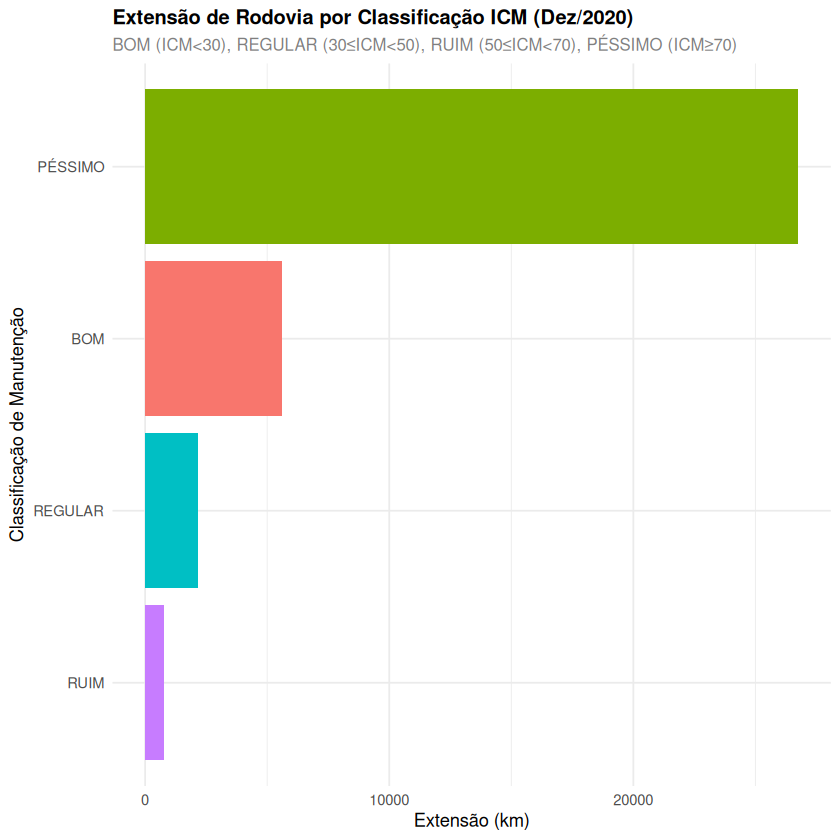

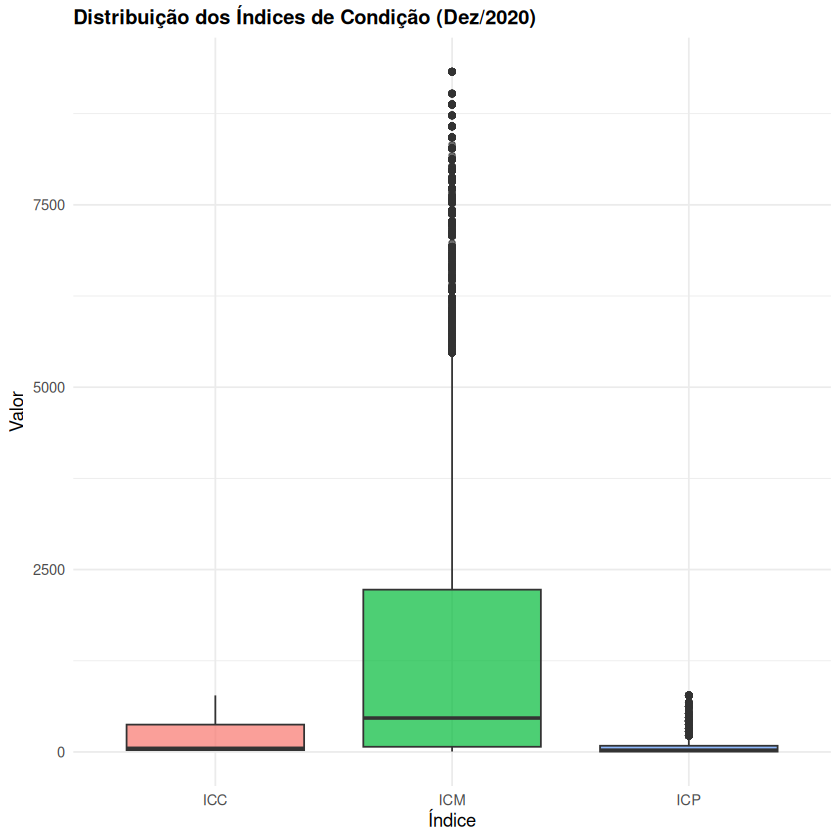

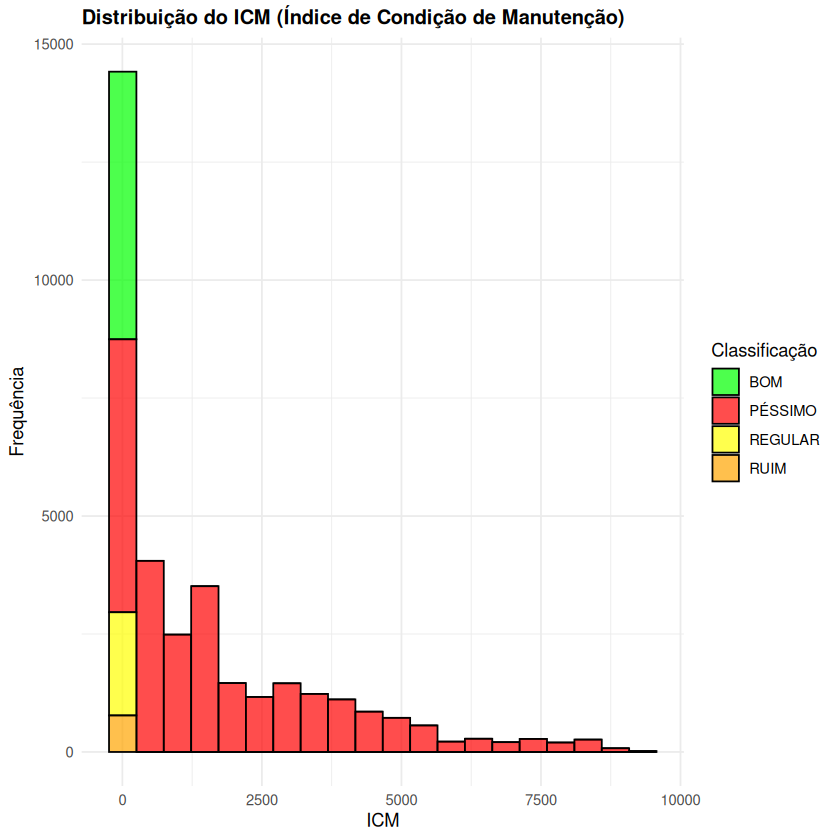

In [15]:
################################################################################
#                      VISUALIZAÇÕES GRÁFICAS                                 #
################################################################################

# Gráfico 1: Distribuição de Extensão por Classificação ICM
df_pavimentos %>%
  group_by(Classificacao_ICM) %>%
  summarise(Extensao_Total = sum(Extensao.km, na.rm = TRUE), .groups = 'drop') %>%
  na.omit() %>%
  ggplot(aes(x = reorder(Classificacao_ICM, Extensao_Total), 
             y = Extensao_Total, 
             fill = Classificacao_ICM)) +
  geom_col(show.legend = FALSE) +
  coord_flip() +
  labs(
    title = "Extensão de Rodovia por Classificação ICM (Dez/2020)",
    x = "Classificação de Manutenção",
    y = "Extensão (km)",
    subtitle = "BOM (ICM<30), REGULAR (30≤ICM<50), RUIM (50≤ICM<70), PÉSSIMO (ICM≥70)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 12),
    plot.subtitle = element_text(size = 10, color = "gray50")
  )

# Gráfico 2: Boxplot dos índices (ICC, ICP, ICM)
df_pavimentos %>%
  select(ICC, ICP, ICM) %>%
  pivot_longer(cols = everything(), names_to = "Índice", values_to = "Valor") %>%
  ggplot(aes(x = Índice, y = Valor, fill = Índice)) +
  geom_boxplot(show.legend = FALSE, alpha = 0.7) +
  labs(
    title = "Distribuição dos Índices de Condição (Dez/2020)",
    x = "Índice",
    y = "Valor"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 12))

# Gráfico 3: Histograma de ICM
df_pavimentos %>%
  ggplot(aes(x = ICM, fill = Classificacao_ICM)) +
  geom_histogram(bins = 20, color = "black", alpha = 0.7) +
  scale_fill_manual(
    values = c("BOM" = "green", "REGULAR" = "yellow", 
               "RUIM" = "orange", "PÉSSIMO" = "red"),
    na.translate = FALSE
  ) +
  labs(
    title = "Distribuição do ICM (Índice de Condição de Manutenção)",
    x = "ICM",
    y = "Frequência",
    fill = "Classificação"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 12))

In [16]:
# Gravar df_pavimento num arquivo parquet "Trabalho/bases-de-dados/condicoes-de-pavimento/
# condicoes-de-pavimento-pq" particionado por ano

################################################################################
#        SALVAR DATASET EM FORMATO PARQUET PARTICIONADO POR ANO               #
################################################################################

# Carregar biblioteca arrow (se não estiver carregada)
library(arrow)

# Preparar dataframe: extrair ano da coluna Data
df_pavimentos <- df_pavimentos %>%
  mutate(
    Ano = format(Data, "%Y")
  )

# Exibir distribuição por ano antes de salvar
cat("\n=== DISTRIBUIÇÃO DO DATASET POR ANO ===\n")
print(table(df_pavimentos$Ano))

# Salvar em Parquet particionado por Ano
write_dataset(
  df_pavimentos,
  path = "Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq",
  format = "parquet",
  partitioning = "Ano"
)

cat("\n✓ Dataset salvo com sucesso em formato Parquet\n")
cat("   Caminho: Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq/\n")
cat("   Estrutura: Ano=2020/, Ano=2021/, Ano=2022/, etc.\n")



=== DISTRIBUIÇÃO DO DATASET POR ANO ===

 2020 
34571 

✓ Dataset salvo com sucesso em formato Parquet
   Caminho: Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq/
   Estrutura: Ano=2020/, Ano=2021/, Ano=2022/, etc.


In [18]:
################################################################################
#                  VERIFICAÇÃO DO DATASET SALVO                               #
################################################################################

# Abrir dataset particionado
df_pavimentos_parquet <- open_dataset(
  "Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq/"
)

cat("\n=== SCHEMA DO DATASET PARQUET ===\n")
print(df_pavimentos_parquet$schema)

# Consultar amostra por ano
cat("\n=== AMOSTRA POR ANO ===\n")
anos_unicos <- df_pavimentos_parquet %>%
  select(Ano) %>%
  distinct() %>%
  collect() %>%
  pull(Ano) %>%
  sort()

for (ano in anos_unicos) {
  amostra <- df_pavimentos_parquet %>%
    filter(Ano == ano) %>%
    head(3) %>%
    collect()
  
  cat("\nAno", ano, "-", nrow(amostra), "registros (primeiros 3):\n")
  print(amostra)
}

cat("\n✓ Leitura do dataset particionado concluída com sucesso\n")

# Crie exemplo de leitura rodando um comando SELECT COUNT(*), ANO GROUP BY ANO para esse arquivo parquet.
################################################################################
#     EQUIVALENTE SQL PURO (USANDO arrow::to_duckdb)                         #
################################################################################

# Alternativa: executar SQL diretamente no dataset Parquet
library(duckdb)

# Conectar DuckDB (in-memory, zero configuração)
con <- dbConnect(duckdb::duckdb())

# Abrir dataset Parquet particionado
ds <- open_dataset("Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq/")

# Registrar como tabela virtual no DuckDB
duckdb_register(con, "dados", ds)

# SELECT * LIMIT 20 (SQL puro!)
resultado <- dbGetQuery(con, "
    SELECT count(*), Ano 
    FROM dados 
    GROUP BY Ano
")

print(resultado)

# Fechar conexão
dbDisconnect(con, shutdown = TRUE)



=== SCHEMA DO DATASET PARQUET ===
Schema
Contrato: string
UF: string
Rodovia: string
km.inicial: double
km.final: double
Extensao.km: double
Data: date32[day]
Latitude: double
Longitude: double
ICC: double
ICP: double
ICM: double
Classificacao_ICM: string
Ano: int32

See $metadata for additional Schema metadata

=== AMOSTRA POR ANO ===



Ano 2020 - 3 registros (primeiros 3):
# A tibble: 3 × 14
  Contrato     UF    Rodovia km.inicial km.final Extensao.km Data       Latitude
  <chr>        <chr> <chr>        <dbl>    <dbl>       <dbl> <date>        <dbl>
1 01 00583/20… AM    BR-230        2132      212         1.2 2020-11-30  -7.20e7
2 01 00583/20… AM    BR-230         212      211         1   2020-11-30  -7.19e7
3 01 00583/20… AM    BR-230         211      210         1   2020-11-30  -7.19e7
# ℹ 6 more variables: Longitude <dbl>, ICC <dbl>, ICP <dbl>, ICM <dbl>,
#   Classificacao_ICM <chr>, Ano <int>

✓ Leitura do dataset particionado concluída com sucesso
  count_star()  Ano
1        34571 2020


## carga de Condições do Pavimento - Dezembro/ 2021


In [20]:
# Monte código R para carga do CSV conforme a seguir. Considere a formatação da data e dos números com vírgula que são floats e estão no formato brasileiro. Padronize os valore nulos para NA.
# UF;Rodovia;km inicial;km final;Extensao km;Data;Latitude;Longitude;Observação;ICC;ICP;ICM
# RS;BR-290;0,000;1,000;1,000;01/12/2021;-29,7495282;-57,0893777;Porto Seco Uruguaiana/RS.;20,000;0,000;6,000
# RS;BR-290;1,000;2,000;1,000;01/12/2021;-29,7495368;-57,089383;Porto Seco Uruguaiana/RS;20,000;0,000;6,000
# RS;BR-290;2,000;2,800;0,800;01/12/2021;-29,7495101;-57,0894646;Porto Seco Uruguaiana/RS.;20,000;0,000;6,000
# MA;BR-402;179,900;178,000;1,900;01/12/2021;-3,3311055;-43,5274917;;25,000;5,000;11,000
# MA;BR-402;178,000;177,000;1,000;01/12/2021;-3,3311055;-43,5274917;;37,500;12,500;20,000
# MA;BR-402;177,000;176,000;1,000;01/12/2021;-3,3311055;-43,5274917;;37,500;25,000;28,750
# MA;BR-402;176,000;175,000;1,000;01/12/2021;-3,3311055;-43,5274917;;37,500;5,000;14,750


################################################################################
#          CARGA DE DADOS - CONDIÇÕES DE PAVIMENTO DAS RODOVIAS              #
#                    SNV 202101A - Dezembro/2021                             #
################################################################################

# Carregar bibliotecas necessárias
library(tidyverse)
library(readr)

# Ler o CSV com separador ponto-e-vírgula
# Formato brasileiro: números com vírgula (,) como separador decimal
# Datas no formato DD/MM/YYYY
# Nota: Coluna "Observação" pode conter valores vazios (;;)
df_pavimentos_dez21 <- read.csv2(
  "Trabalho/bases-de-dados/condicoes-de-pavimento/icm-dez21.csv",
  sep = ";",
  encoding = "UTF-8",
  stringsAsFactors = FALSE,
  na.strings = c("", "-", "NA")  # Tratar vazio, hífen e NA como faltante
)

# Exibir dimensões e primeiras linhas
cat("\n=== RESUMO DO CARREGAMENTO (DEZEMBRO/2021) ===\n")
cat("Dimensões do conjunto de dados:", 
    nrow(df_pavimentos_dez21), "linhas x", 
    ncol(df_pavimentos_dez21), "colunas\n\n")

print(paste("A tabela possui", ncol(df_pavimentos_dez21), "colunas."))

colunas_com_na <- sum(colSums(is.na(df_pavimentos_dez21)) > 0)
print(paste("A tabela possui", colunas_com_na, "colunas com valores ausentes."))

cat("\n=== PRIMEIRAS 6 LINHAS ===\n")
print(head(df_pavimentos_dez21, 6))

################################################################################
#                      ESTRUTURA E TIPOS DE DADOS                             #
################################################################################

cat("\n=== ESTRUTURA DOS DADOS (ANTES DA CONVERSÃO) ===\n")
str(df_pavimentos_dez21)

################################################################################
#         CONVERSÃO E LIMPEZA DE COLUNAS NUMÉRICAS E DE DATA                  #
################################################################################

# Converter colunas numéricas (formato brasileiro com vírgula)
# Note: nomes de colunas R converte espaços em pontos
colunas_numericas <- c(
  "km.inicial", "km.final", "Extensao.km",
  "ICC", "ICP", "ICM"
)

# Aplicar conversão com tratamento de pontos decimais
for (col in colunas_numericas) {
  if (col %in% names(df_pavimentos_dez21)) {
    # Substituir vírgula por ponto e converter para numérico
    df_pavimentos_dez21[[col]] <- as.numeric(
      gsub(",", ".", gsub("\\.", "", df_pavimentos_dez21[[col]]))
    )
  }
}

# Converter coluna de Latitude e Longitude (também têm vírgula)
df_pavimentos_dez21$Latitude <- as.numeric(
  gsub(",", ".", gsub("\\.", "", df_pavimentos_dez21$Latitude))
)

df_pavimentos_dez21$Longitude <- as.numeric(
  gsub(",", ".", gsub("\\.", "", df_pavimentos_dez21$Longitude))
)

# Converter coluna Data de formato DD/MM/YYYY para Date
df_pavimentos_dez21$Data <- as.Date(df_pavimentos_dez21$Data, format = "%d/%m/%Y")

cat("\n=== ESTRUTURA DOS DADOS (APÓS CONVERSÃO) ===\n")
str(df_pavimentos_dez21)



=== RESUMO DO CARREGAMENTO (DEZEMBRO/2021) ===
Dimensões do conjunto de dados: 41414 linhas x 12 colunas

[1] "A tabela possui 12 colunas."
[1] "A tabela possui 1 colunas com valores ausentes."

=== PRIMEIRAS 6 LINHAS ===
  UF Rodovia km.inicial km.final Extensao.km       Data   Latitude Longitude
1 RS  BR-290        0.0      1.0         1.0 01/12/2021 -29.749528 -57.08938
2 RS  BR-290        1.0      2.0         1.0 01/12/2021 -29.749537 -57.08938
3 RS  BR-290        2.0      2.8         0.8 01/12/2021 -29.749510 -57.08946
4 MA  BR-402      179.9    178.0         1.9 01/12/2021  -3.331106 -43.52749
5 MA  BR-402      178.0    177.0         1.0 01/12/2021  -3.331106 -43.52749
6 MA  BR-402      177.0    176.0         1.0 01/12/2021  -3.331106 -43.52749
                 Observação  ICC  ICP   ICM
1 Porto Seco Uruguaiana/RS. 20.0  0.0  6.00
2  Porto Seco Uruguaiana/RS 20.0  0.0  6.00
3 Porto Seco Uruguaiana/RS. 20.0  0.0  6.00
4                      <NA> 25.0  5.0 11.00
5                 


=== ESTRUTURA DOS DADOS (APÓS CONVERSÃO) ===
'data.frame':	41414 obs. of  12 variables:
 $ UF         : chr  "RS" "RS" "RS" "MA" ...
 $ Rodovia    : chr  "BR-290" "BR-290" "BR-290" "BR-402" ...
 $ km.inicial : num  0 1 2 1799 178 ...
 $ km.final   : num  1 2 28 178 177 176 175 174 173 172 ...
 $ Extensao.km: num  1 1 8 19 1 1 1 1 1 1 ...
 $ Data       : Date, format: "2021-12-01" "2021-12-01" ...
 $ Latitude   : num  -2.97e+08 -2.97e+08 -2.97e+08 -3.33e+07 -3.33e+07 ...
 $ Longitude  : num  -5.71e+08 -5.71e+07 -5.71e+08 -4.35e+08 -4.35e+08 ...
 $ Observação : chr  "Porto Seco Uruguaiana/RS." "Porto Seco Uruguaiana/RS" "Porto Seco Uruguaiana/RS." NA ...
 $ ICC        : num  20 20 20 25 375 375 375 375 375 375 ...
 $ ICP        : num  0 0 0 5 125 25 5 125 5 5 ...
 $ ICM        : num  6 6 6 11 20 ...



=== ESTATÍSTICAS DESCRITIVAS (DEZEMBRO/2021) ===


      UF              Rodovia            km.inicial          km.final       
 Length:41414       Length:41414       Min.   :     0.0   Min.   :    -1.0  
 Class :character   Class :character   1st Qu.:   113.0   1st Qu.:   113.0  
 Mode  :character   Mode  :character   Median :   251.0   Median :   250.0  
                                       Mean   :   407.8   Mean   :   395.5  
                                       3rd Qu.:   453.0   3rd Qu.:   449.0  
                                       Max.   :116335.0   Max.   :123265.0  
  Extensao.km            Data               Latitude         
 Min.   :    1.00   Min.   :2021-12-01   Min.   :-999513742  
 1st Qu.:    1.00   1st Qu.:2021-12-10   1st Qu.:-254613213  
 Median :    1.00   Median :2021-12-14   Median :-156151011  
 Mean   :    2.72   Mean   :2021-12-14   Mean   :-194330464  
 3rd Qu.:    1.00   3rd Qu.:2021-12-20   3rd Qu.: -52719334  
 Max.   :48365.00   Max.   :2021-12-31   Max.   : 383661603  
   Longitude           Obse


=== DISTRIBUIÇÃO POR UF ===
# A tibble: 21 × 6
   UF    Total Extensao_Total ICC_Medio ICP_Medio ICM_Medio
   <chr> <int>          <dbl>     <dbl>     <dbl>     <dbl>
 1 BA     5424           5786     215.      102.      1547.
 2 PR     4020           5946     217.      113.      1656.
 3 RS     3820           4100     148.       57.1     1138.
 4 MT     3805          12714     241.       51.8     1243.
 5 MA     3615           3969     205.      128.      2130.
 6 MS     3063           3650     165.      101.      1246.
 7 PI     2600           2716     240.       67.6     1357.
 8 GO     2492           2681     158.       77.2     1145.
 9 CE     2264           2466      54.9     153.      1552.
10 PA     1771          58624     218.       89.5     1319.
# ℹ 11 more rows

=== DISTRIBUIÇÃO POR RODOVIA ===
# A tibble: 90 × 3
   Rodovia Total Extensao_Total
   <chr>   <int>          <dbl>
 1 BR-364   2333           5690
 2 BR-101   2301           2507
 3 BR-158   2135           2297
 4

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      6      51     545    1484    2225    9325 


=== DISTRIBUIÇÃO POR CLASSIFICAÇÃO ICM ===
# A tibble: 4 × 4
  Classificacao_ICM Total Extensao_Total ICM_Medio
  <chr>             <int>          <dbl>     <dbl>
1 PÉSSIMO           30265          94745    2022. 
2 BOM                7315          13223      15.8
3 REGULAR            2912           3473      36.9
4 RUIM                922           1010      57.6


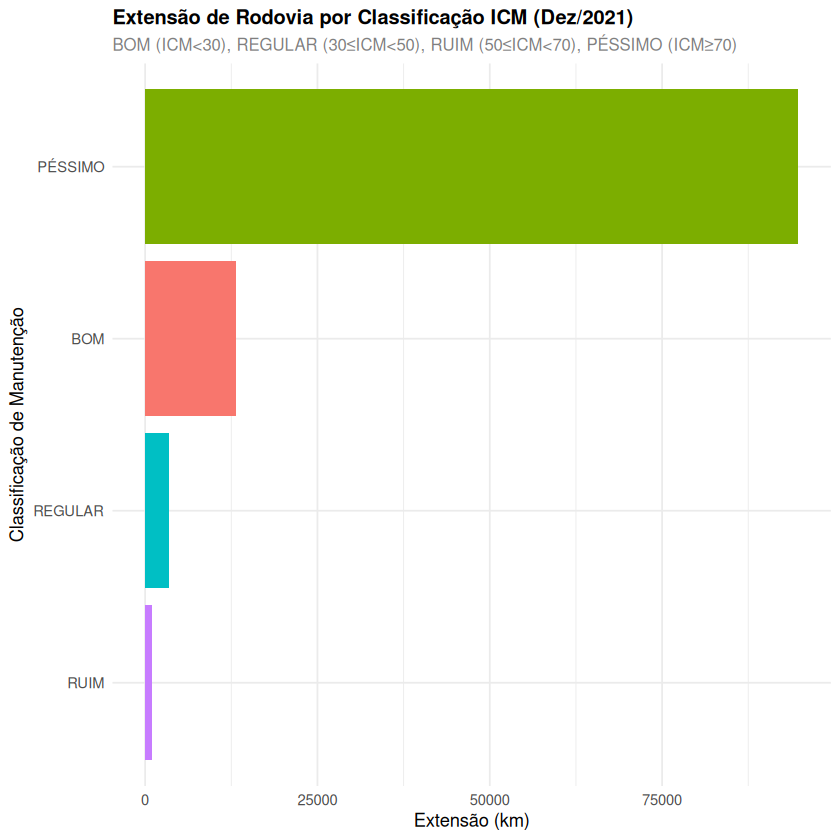

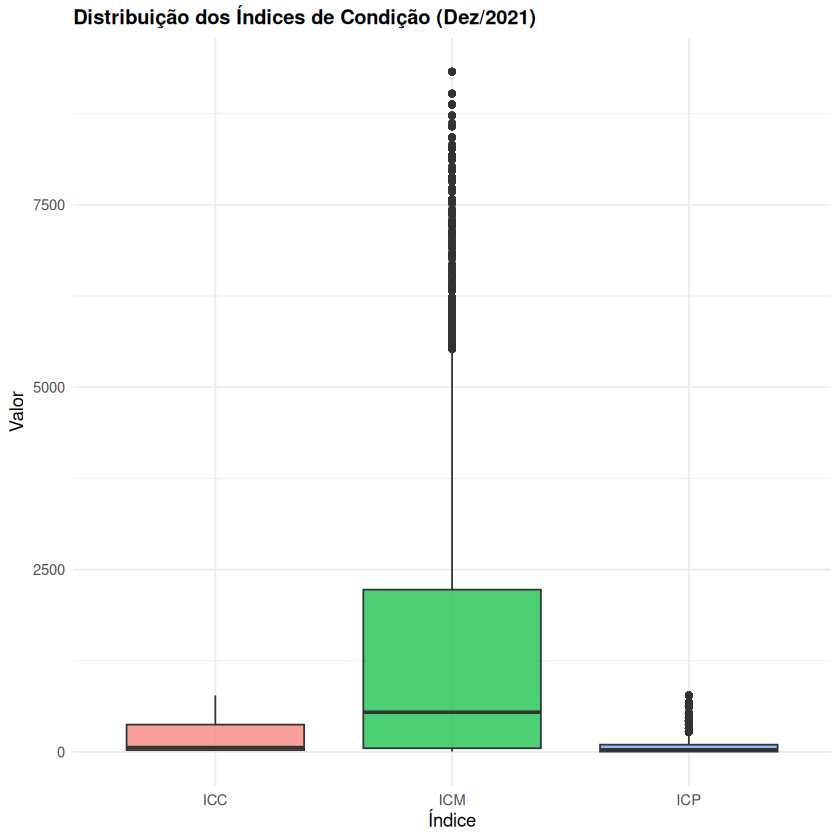

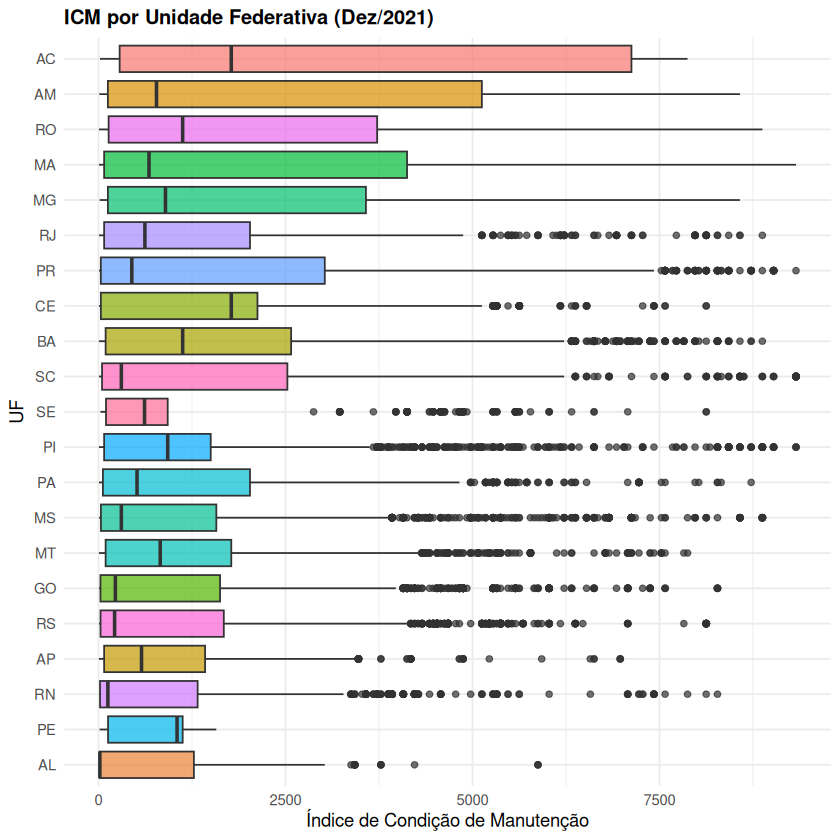

In [21]:
################################################################################
#                    ESTATÍSTICAS DESCRITIVAS                                 #
################################################################################

cat("\n=== ESTATÍSTICAS DESCRITIVAS (DEZEMBRO/2021) ===\n")
summary(df_pavimentos_dez21)

################################################################################
#                    ANÁLISES EXPLORATÓRIAS INICIAIS                          #
################################################################################

# Distribuição por UF
cat("\n=== DISTRIBUIÇÃO POR UF ===\n")
df_pavimentos_dez21 %>%
  group_by(UF) %>%
  summarise(
    Total = n(),
    Extensao_Total = sum(Extensao.km, na.rm = TRUE),
    ICC_Medio = mean(ICC, na.rm = TRUE),
    ICP_Medio = mean(ICP, na.rm = TRUE),
    ICM_Medio = mean(ICM, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(desc(Total)) %>%
  print()

# Distribuição por Rodovia
cat("\n=== DISTRIBUIÇÃO POR RODOVIA ===\n")
df_pavimentos_dez21 %>%
  group_by(Rodovia) %>%
  summarise(
    Total = n(),
    Extensao_Total = sum(Extensao.km, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(desc(Total)) %>%
  print()

# Categorização do ICM (Índice de Condição de Manutenção)
cat("\n=== ESTATÍSTICAS DO ICM (Índice de Condição de Manutenção) ===\n")
summary(df_pavimentos_dez21$ICM)

# Classificação do ICM
df_pavimentos_dez21 <- df_pavimentos_dez21 %>%
  mutate(
    Classificacao_ICM = case_when(
      ICM < 30 ~ "BOM",
      ICM >= 30 & ICM < 50 ~ "REGULAR",
      ICM >= 50 & ICM < 70 ~ "RUIM",
      ICM >= 70 ~ "PÉSSIMO",
      is.na(ICM) ~ NA_character_
    )
  )

cat("\n=== DISTRIBUIÇÃO POR CLASSIFICAÇÃO ICM ===\n")
df_pavimentos_dez21 %>%
  group_by(Classificacao_ICM) %>%
  summarise(
    Total = n(),
    Extensao_Total = sum(Extensao.km, na.rm = TRUE),
    ICM_Medio = mean(ICM, na.rm = TRUE),
    .groups = 'drop'
  ) %>%
  arrange(desc(Total)) %>%
  print()

################################################################################
#                      VISUALIZAÇÕES GRÁFICAS                                 #
################################################################################

# Gráfico 1: Distribuição de Extensão por Classificação ICM
df_pavimentos_dez21 %>%
  group_by(Classificacao_ICM) %>%
  summarise(Extensao_Total = sum(Extensao.km, na.rm = TRUE), .groups = 'drop') %>%
  na.omit() %>%
  ggplot(aes(x = reorder(Classificacao_ICM, Extensao_Total), 
             y = Extensao_Total, 
             fill = Classificacao_ICM)) +
  geom_col(show.legend = FALSE) +
  coord_flip() +
  labs(
    title = "Extensão de Rodovia por Classificação ICM (Dez/2021)",
    x = "Classificação de Manutenção",
    y = "Extensão (km)",
    subtitle = "BOM (ICM<30), REGULAR (30≤ICM<50), RUIM (50≤ICM<70), PÉSSIMO (ICM≥70)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 12),
    plot.subtitle = element_text(size = 10, color = "gray50")
  )

# Gráfico 2: Boxplot dos índices (ICC, ICP, ICM)
df_pavimentos_dez21 %>%
  select(ICC, ICP, ICM) %>%
  pivot_longer(cols = everything(), names_to = "Índice", values_to = "Valor") %>%
  ggplot(aes(x = Índice, y = Valor, fill = Índice)) +
  geom_boxplot(show.legend = FALSE, alpha = 0.7) +
  labs(
    title = "Distribuição dos Índices de Condição (Dez/2021)",
    x = "Índice",
    y = "Valor"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 12))

# Gráfico 3: Comparação por UF
df_pavimentos_dez21 %>%
  ggplot(aes(x = reorder(UF, ICM, FUN = mean), y = ICM, fill = UF)) +
  geom_boxplot(show.legend = FALSE, alpha = 0.7) +
  coord_flip() +
  labs(
    title = "ICM por Unidade Federativa (Dez/2021)",
    x = "UF",
    y = "Índice de Condição de Manutenção"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 12))

In [22]:
# Comparando estrutura dos dois dataframes carregados (2020 vs 2021)
str(df_pavimentos)
str(df_pavimentos_dez21)

'data.frame':	34571 obs. of  14 variables:
 $ Contrato         : chr  "01 00583/2018" "01 00583/2018" "01 00583/2018" "01 00583/2018" ...
 $ UF               : chr  "AM" "AM" "AM" "AM" ...
 $ Rodovia          : chr  "BR-230" "BR-230" "BR-230" "BR-230" ...
 $ km.inicial       : num  2132 212 211 210 209 ...
 $ km.final         : num  212 211 210 209 208 214 215 198 199 200 ...
 $ Extensao.km      : num  1.2 1 1 1 1 0.8 1 0.3 1 1 ...
 $ Data             : Date, format: "2020-11-30" "2020-11-30" ...
 $ Latitude         : num  -71991363 -71949552 -71949552 -71949552 -71949552 ...
 $ Longitude        : num  -5.99e+08 -5.99e+08 -5.99e+08 -5.99e+08 -5.99e+08 ...
 $ ICC              : num  80 80 80 80 80 85 85 375 30 25 ...
 $ ICP              : num  70 70 45 70 45 70 70 325 25 25 ...
 $ ICM              : num  73 73 555 73 555 745 745 34 265 25 ...
 $ Classificacao_ICM: chr  "PÉSSIMO" "PÉSSIMO" "PÉSSIMO" "PÉSSIMO" ...
 $ Ano              : chr  "2020" "2020" "2020" "2020" ...
'data.frame':	41

In [24]:
# Carregar df_pavimentos_dez21 como uma nova partição no arquivo parquet
# "Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq" particionado por ano

################################################################################
#        ADICIONAR NOVA PARTIÇÃO AO DATASET PARQUET EXISTENTE                   #
################################################################################
# Preparar dataframe: extrair ano da coluna Data
df_pavimentos_dez21 <- df_pavimentos_dez21 %>%
  mutate(
    Ano = format(Data, "%Y")
  )
# Adicionar nova partição ao dataset Parquet existente
write_dataset(
  df_pavimentos_dez21,
  path = "Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq",
  format = "parquet",
  partitioning = "Ano",
  existing_data_behavior = "delete_matching"  # Delete existing partição se já existir
)
cat("\n✓ Nova partição (Dezembro/2021) adicionada com sucesso ao dataset Parquet\n")
cat("   Caminho: Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq/\n")
cat("   Estrutura: Ano=2020/, Ano=2021/, Ano=2022/, etc.\n")
################################################################################
#                  VERIFICAÇÃO DO DATASET SALVO                               #
################################################################################
# Abrir dataset particionado
df_pavimentos_parquet <- open_dataset(
  "Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq/"
)   
cat("\n=== SCHEMA DO DATASET PARQUET ATUALIZADO ===\n")
print(df_pavimentos_parquet$schema)
# Consultar amostra por ano
cat("\n=== AMOSTRA POR ANO ===\n")
anos_unicos <- df_pavimentos_parquet %>%
  select(Ano) %>%
  distinct() %>%
  collect() %>%
  pull(Ano) %>%
  sort()
for (ano in anos_unicos) {
  amostra <- df_pavimentos_parquet %>%
    filter(Ano == ano) %>%
    head(3) %>%
    collect()
  cat(paste0("\nAno: ", ano, "\n"))
  print(amostra)
}
cat("\n✓ Leitura do dataset particionado atualizado concluída com sucesso\n")
# Crie exemplo de leitura rodando um comando SELECT COUNT(*), ANO GROUP BY ANO para esse arquivo parquet.
################################################################################
#     EQUIVALENTE SQL PURO (USANDO arrow::to_duckdb)
################################################################################
# Alternativa: executar SQL diretamente no dataset Parquet
library(duckdb)
# Conectar DuckDB (in-memory, zero configuração)
con <- dbConnect(duckdb::duckdb())
# Abrir dataset Parquet particionado
ds <- open_dataset("Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq/")
# Registrar como tabela virtual no DuckDB
duckdb_register(con, "dados", ds)
# SELECT COUNT(*), Ano GROUP BY Ano (SQL puro!)
resultado <- dbGetQuery(con, "
    SELECT count(*) AS Total_Registros, Ano 
    FROM dados 
    GROUP BY Ano
") 
print(resultado)
# Fechar conexão
dbDisconnect(con, shutdown = TRUE)



✓ Nova partição (Dezembro/2021) adicionada com sucesso ao dataset Parquet
   Caminho: Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq/
   Caminho: Trabalho/bases-de-dados/condicoes-de-pavimento/condicoes-de-pavimento-pq/
   Estrutura: Ano=2020/, Ano=2021/, Ano=2022/, etc.
   Estrutura: Ano=2020/, Ano=2021/, Ano=2022/, etc.

=== SCHEMA DO DATASET PARQUET ATUALIZADO ===

=== SCHEMA DO DATASET PARQUET ATUALIZADO ===
Schema
Contrato: string
UF: string
Rodovia: string
km.inicial: double
km.final: double
Extensao.km: double
Data: date32[day]
Latitude: double
Longitude: double
ICC: double
ICP: double
ICM: double
Classificacao_ICM: string
Ano: int32

See $metadata for additional Schema metadata

=== AMOSTRA POR ANO ===
Schema
Contrato: string
UF: string
Rodovia: string
km.inicial: double
km.final: double
Extensao.km: double
Data: date32[day]
Latitude: double
Longitude: double
ICC: double
ICP: double
ICM: double
Classificacao_ICM: string
Ano: int32

See $metadata for a


Ano: 2020
# A tibble: 3 × 14
  Contrato     UF    Rodovia km.inicial km.final Extensao.km Data       Latitude
  <chr>        <chr> <chr>        <dbl>    <dbl>       <dbl> <date>        <dbl>
1 01 00583/20… AM    BR-230        2132      212         1.2 2020-11-30  -7.20e7
2 01 00583/20… AM    BR-230         212      211         1   2020-11-30  -7.19e7
3 01 00583/20… AM    BR-230         211      210         1   2020-11-30  -7.19e7
# ℹ 6 more variables: Longitude <dbl>, ICC <dbl>, ICP <dbl>, ICM <dbl>,
#   Classificacao_ICM <chr>, Ano <int>

Ano: 2021
# A tibble: 3 × 14
  Contrato UF    Rodovia km.inicial km.final Extensao.km Data         Latitude
  <chr>    <chr> <chr>        <dbl>    <dbl>       <dbl> <date>          <dbl>
1 NA       RS    BR-290           0        1           1 2021-12-01 -297495282
2 NA       RS    BR-290           1        2           1 2021-12-01 -297495368
3 NA       RS    BR-290           2       28           8 2021-12-01 -297495101
# ℹ 6 more variables: Longitu

Conseguimos carregar os anos de 2020 e 2021 sem problemas, pois a estrutura dos dataframes é a mesma.